<img src = "https://drive.google.com/uc?export=view&id=1rSrsZ04aJ_D3BC67Cy2dBUZ6tmguydNf" alt = "Encabezado MLDS" width = "100%">  </img>

# **Preparación de los datos**
---

Este notebook es una plantilla que le puede servir como guía para el tercer entregable del proyecto aplicado.

## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. Cristhian Enrique Córdoba Trillos
2. Laura Daniela Zambrano Guacheta

## **0.1 Carga de librerias**
---

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7bede934754d12f343098923ba997615d97a9243316520ecde040187a9e93ef2
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns

## **0.2 Carga de datos**
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
clinical_data = pd.read_csv('/content/drive/MyDrive/Proyecto Aplicado MLDS/S4/diabetic_data.csv')
pd.set_option('display.max_columns', None)
import pandas as pd
pd.concat([clinical_data.head(2), clinical_data.tail(2)])

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,?,?,13,3,3,0,0,0,530,530,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [62]:
relevant_columns = ['patient_nbr','race', 'age', 'weight', 'admission_type_id',
                    'admission_source_id', 'time_in_hospital', 'medical_specialty',
                    'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'diag_1', 'diag_2', 'diag_3',
                    'number_diagnoses','max_glu_serum','insulin','change','diabetesMed','readmitted','gender','discharge_disposition_id']
clean_clinal_dset = clinical_data[relevant_columns].copy()
pd.concat([clean_clinal_dset.head(2), clean_clinal_dset.tail(2)])

,patient_nbr,race,age,weight,admission_type_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,insulin,change,diabetesMed,readmitted,gender,discharge_disposition_id
0,8222157,Caucasian,[0-10),?,6,1,1,Pediatrics-Endocrinology,41,0,1,0,250.83,?,?,1,NaN,No,No,No,NO,Female,25
1,55629189,Caucasian,[10-20),?,1,7,3,?,59,0,18,0,276,250.01,255,9,NaN,Up,Ch,Yes,>30,Female,1
101764,31693671,Caucasian,[80-90),?,2,7,10,Surgery-General,45,2,21,0,996,285,998,9,NaN,Up,Ch,Yes,NO,Female,3
101765,175429310,Caucasian,[70-80),?,1,7,6,?,13,3,3,0,530,530,787,9,NaN,No,No,No,NO,Male,1


In [92]:
prof = ProfileReport(clean_clinal_dset, minimal=False)
prof.to_file(output_file='./clean clinical data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **1. Limpieza de los Datos**
---

La elección de las técnicas de preprocesamiento puede diferir en cada conjunto de datos. Recuerde que es posible aplicar, según sea necesario (no necesariamente todas), las técnicas generales que se han explorado en el curso. La elección dependerá del tipo de datos con el que esté trabajando.

A lo largo de esta entrega, busque responder las siguientes preguntas:

- ¿Cuáles fueron los criterios utilizados para identificar y tratar valores atípicos, datos faltantes o cualquier otra anomalía en el conjunto de datos durante el proceso de limpieza?
- ¿Cómo se justificaría la necesidad de cada paso de preprocesamiento en términos de mejora de la calidad de los datos y preparación para el análisis subsiguiente?

A continuación encontrará los puntos a tratar a medida que va realizando la preparación de los datos. En cada punto defina el estado en que se encontraba el dataset, ademas de explicar y justificar las acciones y decisiones que se tomaron.

### **1.1. Valores faltantes**
---
Al encontrarnos con valores faltantes en el conjunto de datos, es crucial preguntarse:
* ¿Cómo afectan estos valores a la integridad y representatividad de la información?
* ¿Cómo se identificaron los valores faltantes en el conjunto de datos?
* ¿Cuáles fueron los criterios para decidir si rellenar con valores estimados o eliminar los valores faltantes? En caso que aplique, ¿qué método de relleno se utilizó y por qué se consideró apropiado?
* ¿Se realizó un análisis de la distribución de los valores faltantes en relación con las variables clave? Por ejemplo, si hay valores faltantes en una variable crítica, ¿cómo podría afectar la interpretación de los resultados?

In [93]:
clean_clinal_dset.describe()

,patient_nbr,admission_type_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_diagnoses,discharge_disposition_id
count,1.017630e+05,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,5.432965e+07,2.024017,5.754459,4.396018,43.095909,1.339691,16.021835,0.369368,7.422649,3.715515
std,3.869658e+07,1.445414,4.064110,2.985092,19.674220,1.705792,8.127589,1.267282,1.933578,5.279919
min,1.350000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,2.341296e+07,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,6.000000,1.000000
50%,4.550049e+07,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,8.000000,1.000000
75%,8.754571e+07,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,9.000000,4.000000
max,1.895026e+08,8.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,16.000000,28.000000


In [94]:
clean_clinal_dset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101763 entries, 0 to 101765
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   patient_nbr               101763 non-null  int64 
 1   race                      101763 non-null  object
 2   age                       101763 non-null  object
 3   weight                    101763 non-null  object
 4   admission_type_id         101763 non-null  int64 
 5   admission_source_id       101763 non-null  int64 
 6   time_in_hospital          101763 non-null  int64 
 7   medical_specialty         101763 non-null  object
 8   num_lab_procedures        101763 non-null  int64 
 9   num_procedures            101763 non-null  int64 
 10  num_medications           101763 non-null  int64 
 11  number_outpatient         101763 non-null  int64 
 12  diag_1                    101763 non-null  object
 13  diag_2                    101763 non-null  object
 14  diag_3   

In [95]:
conteo_nulos = clean_clinal_dset[relevant_columns].isnull().sum()
conteo_nulos

,0
patient_nbr,0
race,0
age,0
weight,0
admission_type_id,0
admission_source_id,0
time_in_hospital,0
medical_specialty,0
num_lab_procedures,0
num_procedures,0


In [96]:
conteo_null=clean_clinal_dset['max_glu_serum'].isnull().sum()
print(f"\033[1m La cantidad de valores nulos en la columna es: {conteo_null} y su proporción sobre el total es {100*conteo_null/clean_clinal_dset.shape[0]:.2f}% \033[0m")

 La cantidad de valores nulos en la columna es: 96417 y su proporción sobre el total es 94.75% 


In [97]:
clean_clinal_dset = clean_clinal_dset.drop(columns=['max_glu_serum'])

//

Se muestra que la completitud de la base de datos es bastante amplia. De las 22 columnas que componen el dataframe, solo 1 de ellas muestra valores nulos (max_glu_serum).

La variable en cuestión fue elegida inicialmente como una variable a tener en cuenta por la naturaleza de su información (nivel máximo de glucosa en el test) y su relación con la variable objetivo (si un paciente es re-admitido o no).

La columna de max_glu_serum muestra una cantidad absoluta de 96.420 valores nulos de 101.767 registros posibles; es decir, una proporción de nulos de 95%. Dada la alta proporción de nulos para la columna, esta no nos útil y será retirada del análisis.

No pensamos que la eliminación de esta variable afecte de forma negativa el análisis y modelos futuros dado que es una varibale de baja completitud, y debido a que hay otras 2 variables que relacionan el azucar en sangre de los pacientes como son variables de diabetes medicada y de reseta de insulina como medicamento para el paciente ("diabetesMed" e "Insulina").



### **1.2. Valores duplicados**
----


In [98]:
filas = clean_clinal_dset.shape[0]
print(f"\033[1m La cantidad de registros del dataset es de: {filas} \033[0m")

 La cantidad de registros del dataset es de: 101763 


In [99]:
verificar_dup = clean_clinal_dset.drop_duplicates()
verificar_dup.shape[0]
print(f"\033[1m La cantidad de registros del dataset luego de eliminar duplicados \n a partir de todas sus variables es de: {verificar_dup.shape[0]} \033[0m")

 La cantidad de registros del dataset luego de eliminar duplicados 
 a partir de todas sus variables es de: 101763 


+ Vemos que no hay registros duplicados en la base de datos a partir de todas sus columnas.

+ Adicional, de acuerdo con la descripción del dataset, cada registro representa un evento independiente de cada paciente.

In [100]:
base_ids=clean_clinal_dset.groupby('patient_nbr').size().reset_index(name='Conteo_x_paciente')
base_ids.sort_values(by='Conteo_x_paciente', ascending=False)

,patient_nbr,Conteo_x_paciente
54472,88785891,40
32927,43140906,28
3515,1660293,23
54055,88227540,23
17018,23199021,23
...,...,...
33969,44115975,1
33970,44117361,1
33971,44117568,1
33972,44117919,1


In [101]:
clean_clinal_dset[clean_clinal_dset['patient_nbr']==88785891].head()

,patient_nbr,race,age,weight,admission_type_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,diag_1,diag_2,diag_3,number_diagnoses,insulin,change,diabetesMed,readmitted,gender,discharge_disposition_id
38307,88785891,Caucasian,[20-30),?,1,7,1,Emergency/Trauma,32,0,10,0,250.13,244,490,3,Up,Ch,Yes,>30,Female,1
40252,88785891,Caucasian,[20-30),?,1,7,1,Emergency/Trauma,10,0,10,1,250.11,244,?,2,Down,Ch,Yes,<30,Female,1
40661,88785891,Caucasian,[20-30),?,1,7,5,Emergency/Trauma,35,0,15,1,250.13,536,V58,6,Up,Ch,Yes,>30,Female,1
44515,88785891,Caucasian,[20-30),?,3,7,2,Surgery-General,1,0,8,1,250.11,465,244,3,Up,Ch,Yes,<30,Female,1
45147,88785891,Caucasian,[20-30),?,1,7,2,Emergency/Trauma,32,0,4,1,250.11,V58,V15,9,Up,Ch,Yes,<30,Female,1


+ Aunque cada registro muestre un evento y no hayan registros duplicados, se muestra que existen pacientes que ingresaron multiples veces al hospital, por ejemplo, se muestra que el paciente con el **ID=88785891** cuenta con 40 ingresos al hospital durante el periodo de análisis.

### **1.3. Valores atípicos**
---
Al abordar valores atípicos, es relevante cuestionarse sobre la naturaleza de estos puntos extremos.
* ¿Son errores de medición o representan información válida pero excepcional?

  Para las variables continuas, utilizamos diagramas de caja para identificar los valores atípicos. Este método nos ayuda a visualizar si los puntos extremos son errores de medición o valores válidos pero excepcionales, por ejemplo, la variable **age** tiene valores válidos pero excepcionales, dado que estos rangos de edad son menos comunes pero no necesariamente incorrectos,  ya que los valores atípicos están claramente marcados fuera de los "bigotes" del diagrama. Para las variables categóricas, usamos agrupaciones por barra para analizar la distribución de las categorías y determinar si los valores atípicos son errores de medición o categorías menos frecuentes pero válidas.

* ¿Qué criterios o técnicas se utilizaron para identificar los valores atípicos?

  En el caso de las variables continuas, los diagramas de caja nos permiten identificar los valores atípicos mediante la visualización de puntos que caen fuera de los bigotes del boxplot. Para las variables categóricas, los gráficos de barras permiten observar si hay categorías con un número de casos extremadamente bajo en comparación con otras.

* ¿Se aplicaron métodos estadísticos o visuales para detectar los valores atípicos?

  Utilizamos métodos visuales para detectar valores atípicos. Los diagramas de caja proporcionan una representación gráfica clara de los valores atípicos en variables continuas, mientras que los gráficos de barras para variables categóricas, segmentados en deciles, permiten observar la distribución y posibles anomalías en la frecuencia de categorías.

* ¿Cuál fue la decisión final sobre cómo tratar los valores atípicos y por qué?

Las variables de **weight** y **age** son aquellas variables que más llaman la atención por su distribución de datos atípicos, sin embargo, estas serán tratadas en la siguiente sección de **datos corruptos** dada la naturaleza que describimos más adelante.

Para el resto de variables, no vemos la necesidad de realizar ninguna acción pues la presencia de algunos valores atípicos en ellas representa una naturaleza válida de los datos.

In [102]:
p_mayor1 = base_ids[base_ids['Conteo_x_paciente']>1].shape[0]
p_igual1 = base_ids[base_ids['Conteo_x_paciente']<2].shape[0]
print(f"\033[1m Los pacientes que han ingresado 1 sola vez al hospital durante el periodo \n de análisis son:{p_igual1} y los que ingresaron más de 1 vez son: {p_mayor1} \033[0m")

 Los pacientes que han ingresado 1 sola vez al hospital durante el periodo 
 de análisis son:54742 y los que ingresaron más de 1 vez son: 16773 


In [103]:
base_ids['Rango'] = pd.cut(base_ids['Conteo_x_paciente'], bins=range(0, base_ids['Conteo_x_paciente'].max() + 5, 5))
tabla_rangos = base_ids.groupby('Rango').size().reset_index(name='Cantidad_de_pacientes')
tabla_rangos

<ipython-input-103-5cd92a2bbbfb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_rangos = base_ids.groupby('Rango').size().reset_index(name='Cantidad_de_pacientes')


,Rango,Cantidad_de_pacientes
0,"(0, 5]",70642
1,"(5, 10]",776
2,"(10, 15]",67
3,"(15, 20]",22
4,"(20, 25]",6
5,"(25, 30]",1
6,"(30, 35]",0
7,"(35, 40]",1


+ Vemos que existen datos atípicos en la cantidad de readmisiones por paciente, donde el 98,8% solo ingresaron 1 vez, y el restante 1.2% se distribuye en valores de 2 a 7 readmisiones.

In [104]:
def analyze_column(df, column):
    #print(df[column].describe().T)
    print(df[column].describe())
    counts = df[column].value_counts()
    # Calculate percentage of total for each unique value
    percentages = (counts / counts.sum()) * 100
    # Create a DataFrame for the table
    table_df = pd.DataFrame({
        'Count': counts,
        'Percentage of Total (%)': percentages
    })
    # Display the table
    print(table_df)
    # Set the figure size
    plt.figure(figsize=(10, 6))
    # Create a bar graph of category counts
    # Sort DataFrame by column
    sorted_df = df.sort_values(by=column)
    # Calculate counts and percentage of total for each category in the sorted DataFrame
    category_counts = sorted_df[column].value_counts()
    category_percentages = (category_counts / category_counts.sum()) * 100
    # Set the figure size
    plt.figure(figsize=(10, 6))
    # Create a bar graph of category percentages
    category_percentages.plot.bar(color='blue')
    plt.title('Bar Graph of Category Percentages')
    plt.xlabel('Category')
    plt.ylabel('Percentage of Total')
    plt.show()

def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))

    sns.boxplot(x=df[column], color='blue')

    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)

    # Mostrar el gráfico
    plt.show()

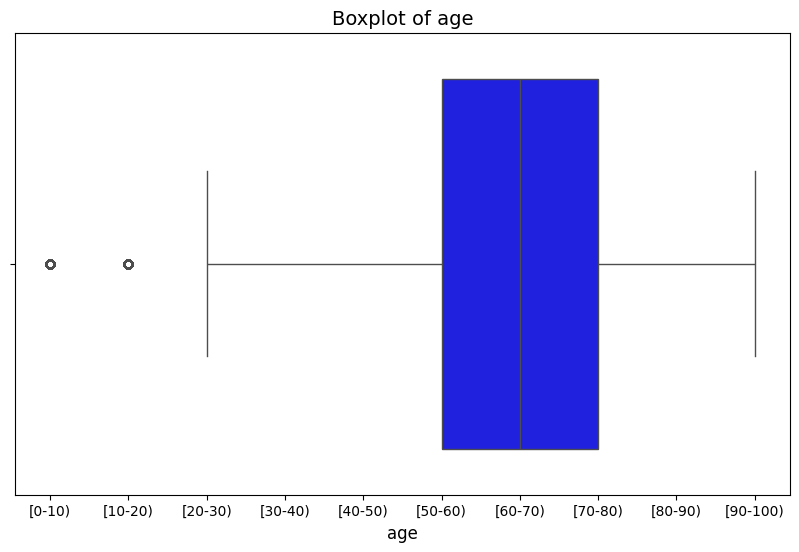

In [105]:
plot_boxplot(clean_clinal_dset, 'age')

In [106]:
print(clean_clinal_dset['age'].value_counts().sort_values())


age
[0-10)        161
[10-20)       691
[20-30)      1657
[90-100)     2793
[30-40)      3775
[40-50)      9685
[80-90)     17197
[50-60)     17256
[60-70)     22482
[70-80)     26066
Name: count, dtype: int64


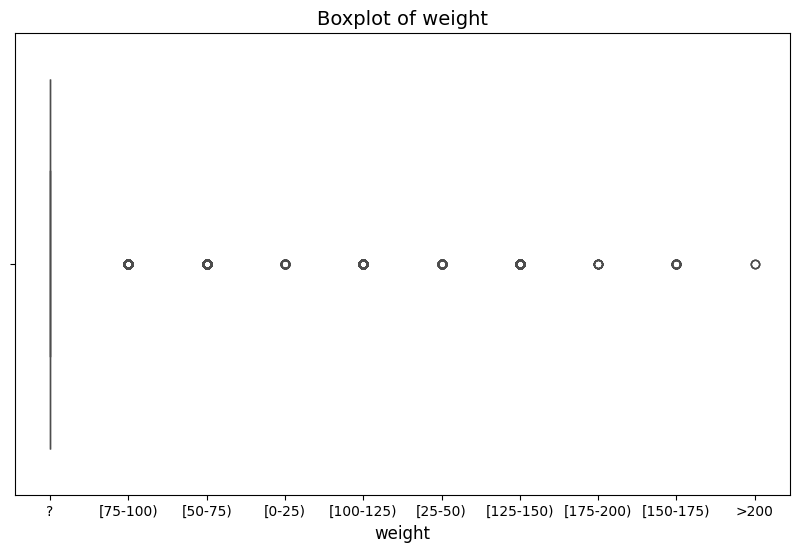

In [107]:
plot_boxplot(clean_clinal_dset, 'weight')

In [108]:
print(clean_clinal_dset['weight'].value_counts().sort_values())

weight
>200             3
[175-200)       11
[150-175)       35
[0-25)          48
[25-50)         97
[125-150)      145
[100-125)      625
[50-75)        897
[75-100)      1336
?            98566
Name: count, dtype: int64


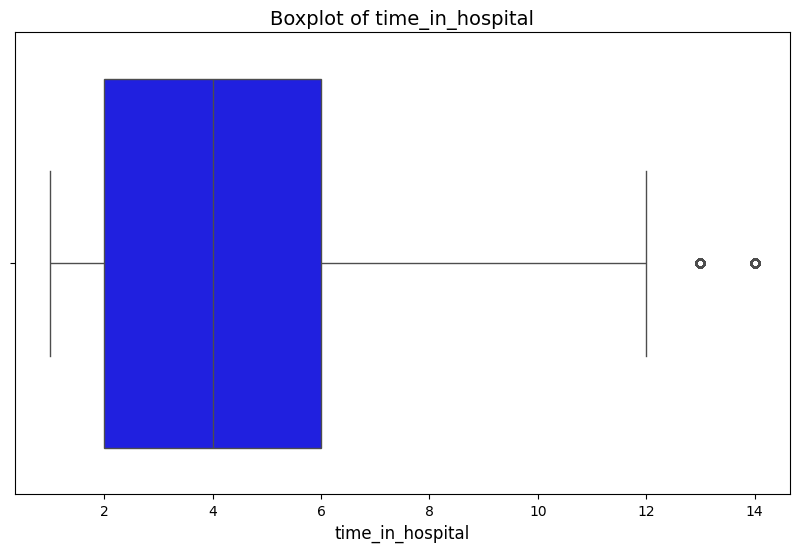

In [109]:
plot_boxplot(clean_clinal_dset, 'time_in_hospital')

In [110]:
print(clean_clinal_dset['time_in_hospital'].value_counts().sort_values())

time_in_hospital
14     1042
13     1210
12     1448
11     1855
10     2342
9      3002
8      4390
7      5859
6      7539
5      9966
4     13924
1     14206
2     17224
3     17756
Name: count, dtype: int64


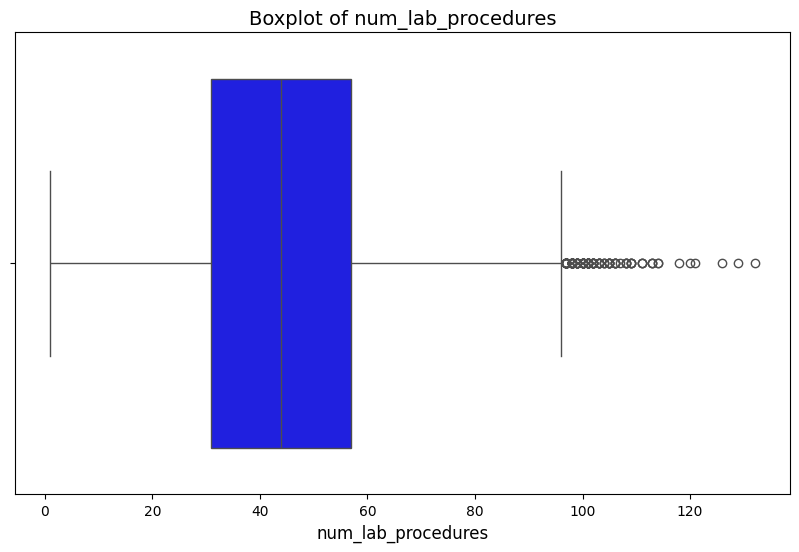

In [111]:
plot_boxplot(clean_clinal_dset, 'num_lab_procedures')

In [112]:
print(clean_clinal_dset['num_lab_procedures'].value_counts().sort_values())

num_lab_procedures
118       1
107       1
129       1
126       1
132       1
       ... 
38     2212
45     2376
44     2496
43     2804
1      3208
Name: count, Length: 118, dtype: int64


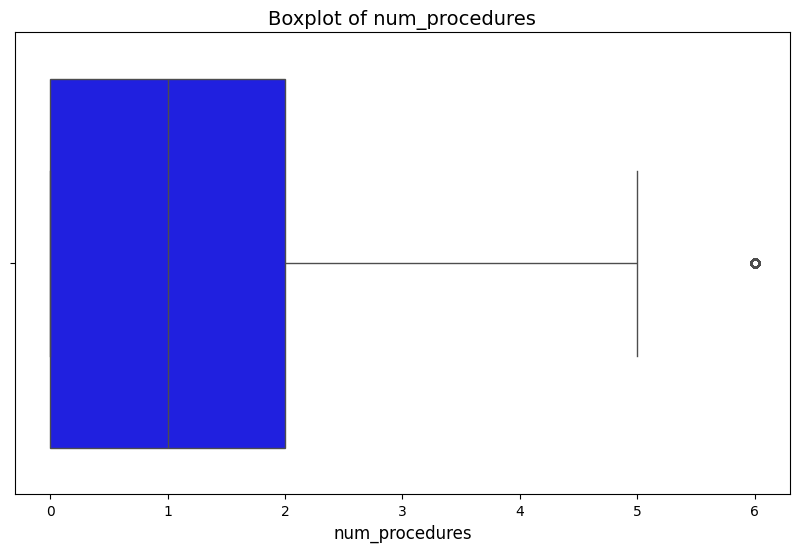

In [113]:
plot_boxplot(clean_clinal_dset, 'num_procedures')

In [114]:
print(clean_clinal_dset['num_procedures'].value_counts().sort_values())

num_procedures
5     3077
4     4180
6     4954
3     9443
2    12716
1    20741
0    46652
Name: count, dtype: int64


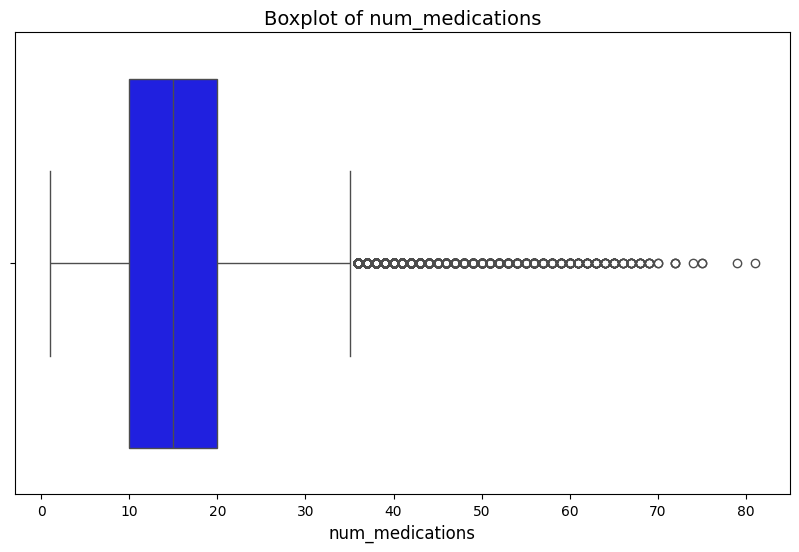

In [115]:
plot_boxplot(clean_clinal_dset, 'num_medications')

In [116]:
print(clean_clinal_dset['num_medications'].value_counts().sort_values())

num_medications
74       1
79       1
81       1
75       2
70       2
      ... 
14    5707
15    5792
11    5795
12    6004
13    6086
Name: count, Length: 75, dtype: int64


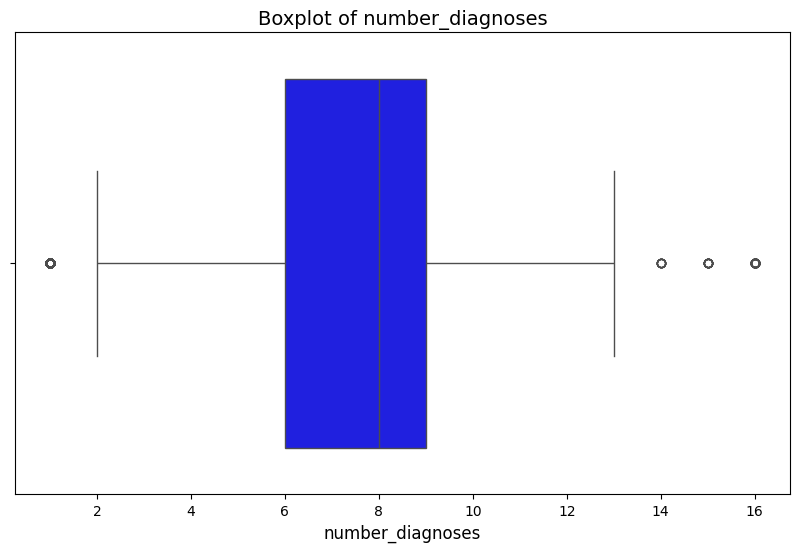

In [117]:
plot_boxplot(clean_clinal_dset, 'number_diagnoses')

count        101763
unique            5
top       Caucasian
freq          76099
Name: race, dtype: object
                 Count  Percentage of Total (%)
race                                           
Caucasian        76099                74.780618
AfricanAmerican  19210                18.877195
Other/Unknown     3776                 3.710582
Hispanic          2037                 2.001710
Asian              641                 0.629895


<Figure size 1000x600 with 0 Axes>

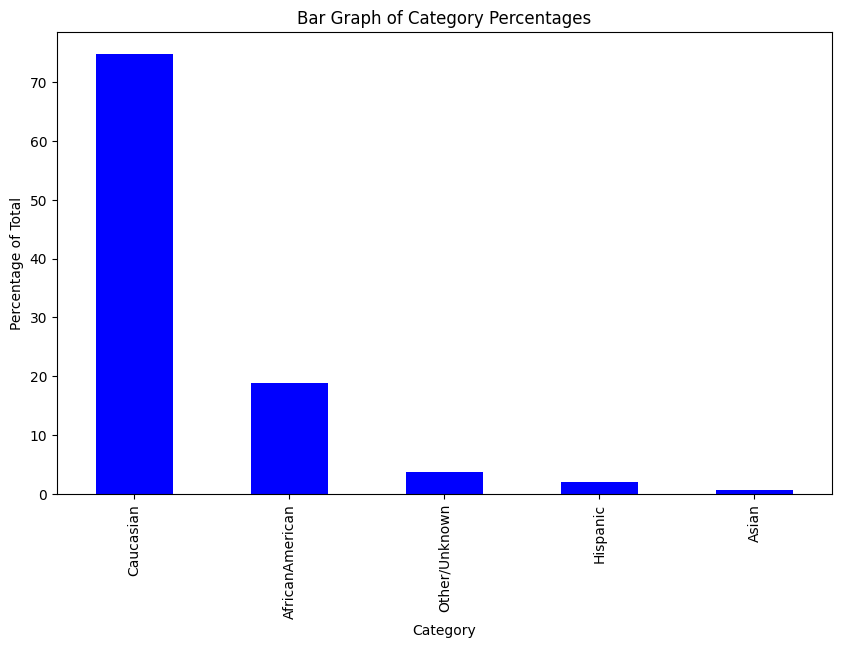

In [118]:
analyze_column(clean_clinal_dset, 'race')

count    101763.000000
mean          2.024017
std           1.445414
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           8.000000
Name: admission_type_id, dtype: float64
                   Count  Percentage of Total (%)
admission_type_id                                
1                  53988                53.052681
3                  18868                18.541120
2                  18480                18.159842
6                   5291                 5.199336
5                   4785                 4.702102
8                    320                 0.314456
7                     21                 0.020636
4                     10                 0.009827


<Figure size 1000x600 with 0 Axes>

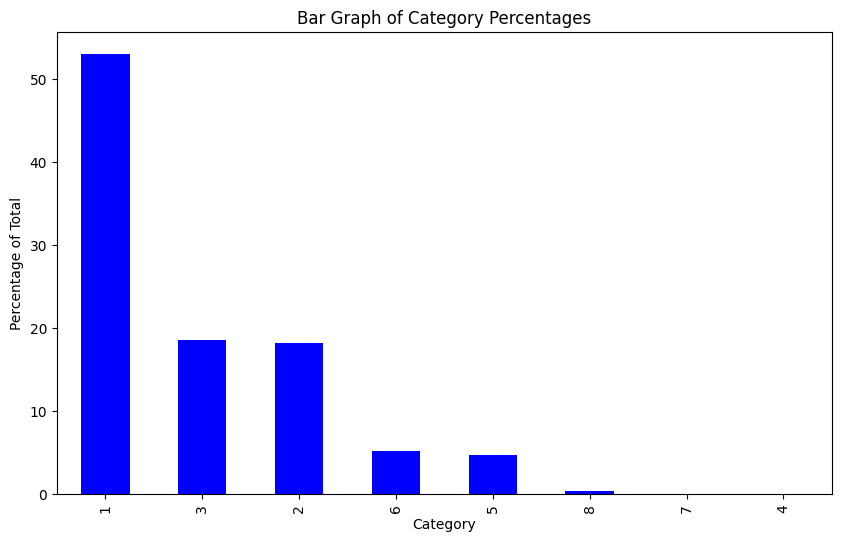

In [119]:
analyze_column(clean_clinal_dset, 'admission_type_id')

count    101763.000000
mean          5.754459
std           4.064110
min           1.000000
25%           1.000000
50%           7.000000
75%           7.000000
max          25.000000
Name: admission_source_id, dtype: float64
                     Count  Percentage of Total (%)
admission_source_id                                
7                    57492                56.495976
1                    29564                29.051816
17                    6781                 6.663522
4                     3187                 3.131787
6                     2264                 2.224777
2                     1104                 1.084874
5                      855                 0.840187
3                      187                 0.183760
20                     161                 0.158211
9                      125                 0.122834
8                       16                 0.015723
22                      12                 0.011792
10                       8                 0.0

<Figure size 1000x600 with 0 Axes>

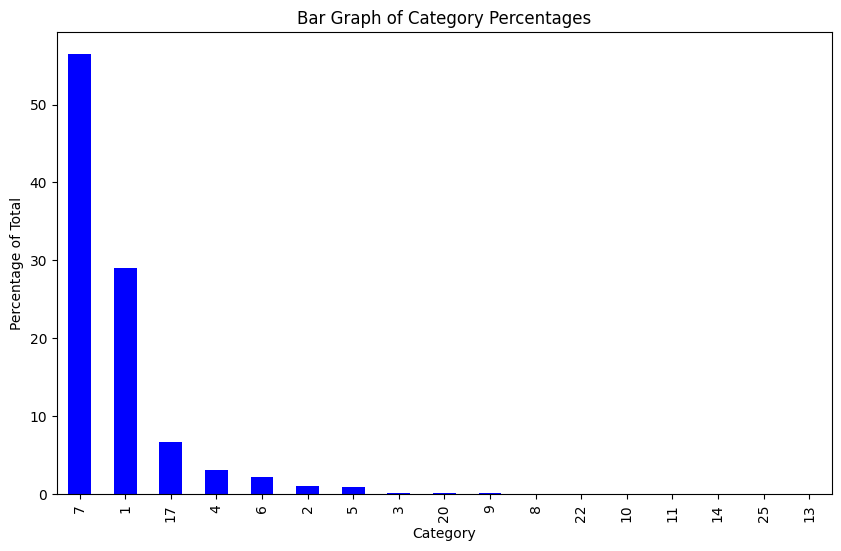

In [120]:
analyze_column(clean_clinal_dset, 'admission_source_id')

count     101763
unique        73
top            ?
freq       49947
Name: medical_specialty, dtype: object
                               Count  Percentage of Total (%)
medical_specialty                                            
?                              49947                49.081690
InternalMedicine               14635                14.381455
Emergency/Trauma                7565                 7.433940
Family/GeneralPractice          7440                 7.311105
Cardiology                      5351                 5.258296
...                              ...                      ...
SportsMedicine                     1                 0.000983
Speech                             1                 0.000983
Perinatology                       1                 0.000983
Neurophysiology                    1                 0.000983
Pediatrics-InfectiousDiseases      1                 0.000983

[73 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

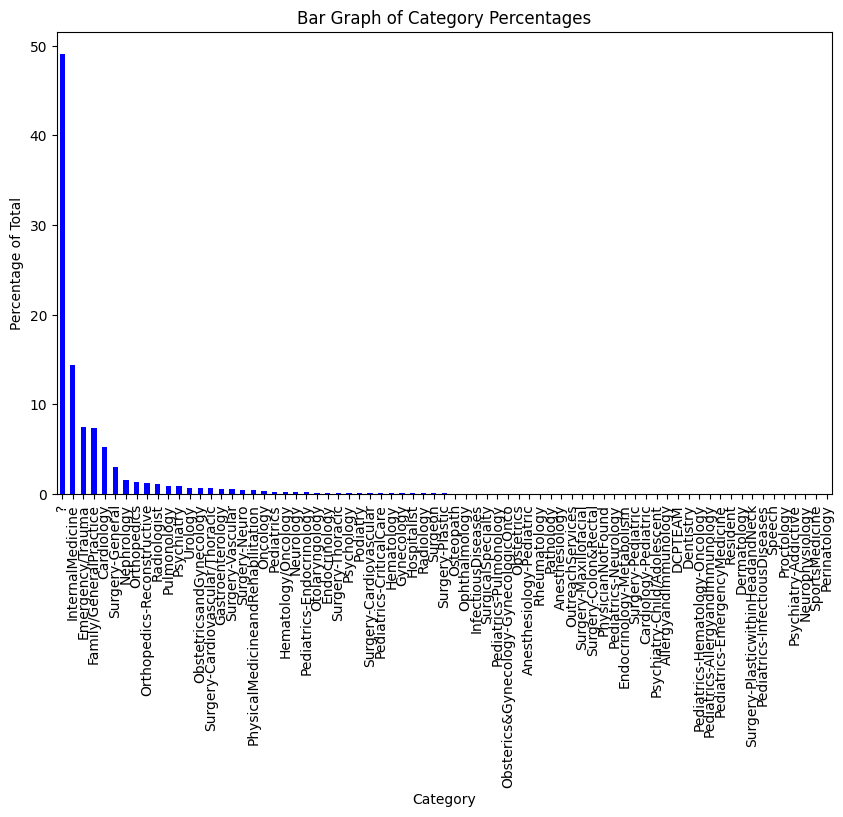

In [121]:
analyze_column(clean_clinal_dset, 'medical_specialty')

count     101763
unique       717
top          428
freq        6862
Name: diag_1, dtype: object
        Count  Percentage of Total (%)
diag_1                                
428      6862                 6.743119
414      6580                 6.466004
786      4016                 3.946425
410      3614                 3.551389
486      3508                 3.447225
...       ...                      ...
373         1                 0.000983
314         1                 0.000983
684         1                 0.000983
217         1                 0.000983
V51         1                 0.000983

[717 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

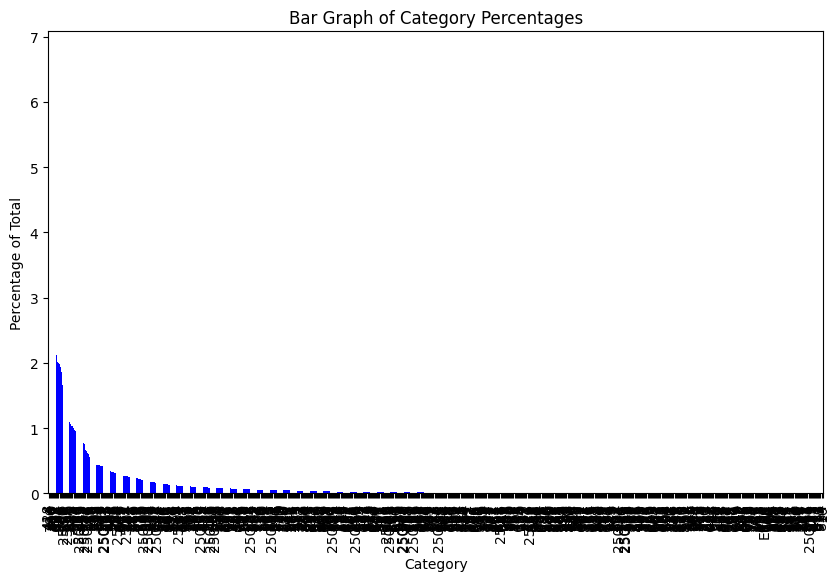

In [122]:
analyze_column(clean_clinal_dset, 'diag_1')

count     101763
unique       749
top          276
freq        6752
Name: diag_2, dtype: object
        Count  Percentage of Total (%)
diag_2                                
276      6752                 6.635025
428      6662                 6.546584
250      6071                 5.965823
427      5036                 4.948753
401      3736                 3.671275
...       ...                      ...
E918        1                 0.000983
46          1                 0.000983
V13         1                 0.000983
E850        1                 0.000983
927         1                 0.000983

[749 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

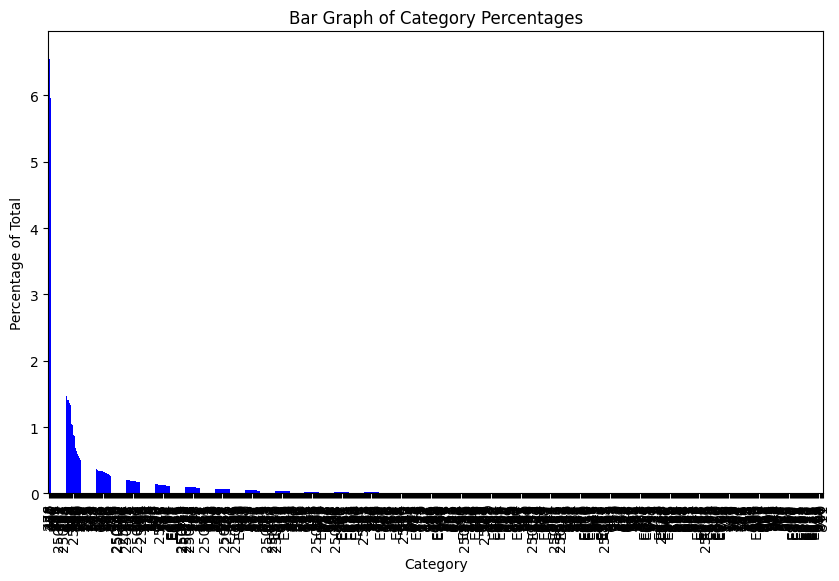

In [123]:
analyze_column(clean_clinal_dset, 'diag_2')

In [ ]:
analyze_column(clean_clinal_dset, 'diag_3')

count     101763
unique       790
top          250
freq       11555
Name: diag_3, dtype: object
        Count  Percentage of Total (%)
diag_3                                
250     11555                11.354815
401      8288                 8.144414
276      5175                 5.085345
428      4577                 4.497705
427      3955                 3.886481
...       ...                      ...
657         1                 0.000983
684         1                 0.000983
603         1                 0.000983
E826        1                 0.000983
971         1                 0.000983

[790 rows x 2 columns]


In [ ]:
analyze_column(clean_clinal_dset, 'insulin')

In [ ]:
analyze_column(clean_clinal_dset, 'change')

In [ ]:
analyze_column(clean_clinal_dset, 'diabetesMed')

In [ ]:
analyze_column(clean_clinal_dset, 'readmitted')

In [ ]:
analyze_column(clean_clinal_dset, 'gender')

### **1.4. Datos Inconsistentes**
---
Frente a inconsistencias en los datos, es importante analizar cómo estas discrepancias podrían afectar la comparabilidad y comprensión de la información.

* ¿Cómo se identificaron las inconsistencias en los datos?

  Se hizo una revisón exhaustiva de los datos variable por variable, en donde no encontramos incosistencias para las variables categóricas a partir de las distribuciones de cada categoría para dada variable. Para las variables numéricas nos llama la atención la variable de **número de diagnósticos** pues presenta una pequeña cantidad de casos (0.1% de valores atípicos) con una cantidad de diagnósticos muy eleveada (+10 diagnósticos), sin embargo, esto puede ser una característica válida de los datos.

* ¿Las inconsistencias son lo suficientemente significativas como para justificar una estandarización?

  No realizamos ninguna estandarización en las variables explicativas o variable objetivo.

* ¿Cómo se pueden homogeneizar unidades y formatos para garantizar coherencia en el análisis?

No fue necesario en nuestro ejercicio.

* ¿Qué estrategias se implementaron para abordar las inconsistencias y asegurar la coherencia?

No fue necesario en nuestro ejercicio.

* ¿Se establecieron reglas de validación específicas para garantizar la consistencia?

No fue necesario en nuestro ejercicio.

In [ ]:
def create_decile_table(df, column):
    df = df.copy()
    # Identify NaN values and assign them a separate group
    df.loc[df[column].isnull(), 'decile'] = -1
    # Identify zero values and assign them a separate group
    df.loc[df[column] == 0, 'decile'] = 0
    # Calculate deciles only for positive values
    df.loc[df[column] > 0, 'decile'] = pd.qcut(df.loc[df[column] > 0, column], 9, labels=False, duplicates='drop') + 1
    # Create a table with min, max values, count of cases and % of total cases per decile
    table = df.groupby('decile').agg(
        min_value=(column, 'min'),
        max_value=(column, 'max'),
        count=(column, 'count')
    ).reset_index()
    # Calculate % of total cases
    total_cases = table['count'].sum()
    table['% of total cases'] = 100 * table['count'] / total_cases
    # Call analyze_column function
    #analyze_result = analyze_column(df, 'decile')
    #return table, analyze_result
    return table

In [ ]:
create_decile_table(clean_clinal_dset, 'time_in_hospital')

In [ ]:
create_decile_table(clean_clinal_dset, 'num_lab_procedures')

In [ ]:
create_decile_table(clean_clinal_dset, 'num_medications')

In [ ]:
create_decile_table(clean_clinal_dset, 'num_procedures')

In [ ]:
create_decile_table(clean_clinal_dset, 'number_diagnoses')

In [ ]:
clean_clinal_dset.head()

### **1.5. Datos corruptos**
---
En la detección de datos corruptos, pregunte si hay posibles errores de entrada o problemas de transferencia que podrían haber afectado la integridad de los datos.
* ¿Cómo se determinó la presencia de datos corruptos en el conjunto de datos?

Por medio de la verificación del rango de las variables continuas y valores unicos de las variables categóricas.

* ¿Qué medidas se tomaron para corregir o eliminar los datos corruptos?

Para la variable **gender** que solo el 0.001% de los datos estaba corrupto, la desición fue eliminar dichos registros.

Para la variable **weight** dado que el 98% de los registros estaban mal diligenciados/omitidos se decidio eliminar la variable del análisis.

Por último, la variable **race** que mostraba tanto una categoría de **Uknown** como una de **Otros**, decidimos unificar dichas categorías en una sola pues la proporción de registros en ambas categorías además es baja.

* ¿Hubo casos en los que la corrupción de datos no pudo ser manejada y cómo se justificó esa decisión?

Sí, la corrupción de datos en la variable de **weight** no pudo ser manejada dado el alto porcentaje de datos corruptos sobre el total (98%). En este caso, la decisión fue eliminar dicha variable del análisis.

In [ ]:
print(clean_clinal_dset['gender'].unique())
print(clean_clinal_dset['gender'].value_counts().unique())

In [ ]:
clean_clinal_dset = clean_clinal_dset[clean_clinal_dset['gender'].isin(['Male','Female'])]

+ Se observa que hay datos corruptos en la variable "gender" dado que hay 3 registros con un sexo "indefinido/Inválido", en este caso procedemos a eliminar dichos registros.

In [ ]:
print(clean_clinal_dset['weight'].unique())
print(clean_clinal_dset['weight'].value_counts().unique())

In [ ]:
conteo_null_w=clean_clinal_dset[clean_clinal_dset['weight']=="?"]
conteo_null_w=conteo_null_w.shape[0]
print(f"\033[1m La cantidad de valores nulos en la columna es: {conteo_null_w} y su proporción sobre el total es {100*conteo_null_w/clean_clinal_dset.shape[0]:.2f}% \033[0m")


+ Se observa que, si bien, la columna weight no muestra valores Null/NA, muestra valores en "?" lo cual no representa una categoría válida para el análisis.
+ Adicional, la proporción de "?" sobre el total es del 97%, lo cual lo hace una variable irrelevante para nuestra análisis. Por tanto, la variable "weight" es eliminada de nuestro análisis.

In [ ]:
print(clean_clinal_dset['race'].unique())
print(clean_clinal_dset['race'].value_counts().unique())

In [ ]:
clean_clinal_dset['race']=clean_clinal_dset['race'].replace(['?', 'Other'], 'Other/Unknown')
print(clean_clinal_dset['race'].unique())

+ Dado que el dataset presenta una categoría de raza "desconocida" y otra categoría de raza "Otra" a las demás listadas, decidimos unificar ambas categorías en una sola llamada "Other/Unknow".

### **1.6. Selección de datos**
---
En la selección de datos, reflexione sobre las variables que son realmente relevantes para sus objetivos de análisis.
* ¿Qué criterios se utilizaron para seleccionar los datos relevantes para el análisis?

Nuestras columnas relevantes a inicios del análisis eran: 'patient_nbr','race', 'age', 'weight', 'admission_type_id', 'admission_source_id', 'time_in_hospital', 'medical_specialty','num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'insulin', 'change', 'diabetesMed', 'readmitted', 'gender', 'discharge_disposition_id'.

Luego del proceso de preparación de datos, las columnas de: 'patient_nbr' como columna identificadora de cada paciente, y las columnas 'max_glu_serum' y 'weight' fueron eliminadas dada sus bajas completitudes o corrupción. Además ,algunas otras columnas sufrieron modificaciones en sus valores posibles dadas las conclusiones alcanzadas (como por ejemplo, Gender o Race).

* ¿Se aplicaron técnicas de muestreo o filtrado para reducir el tamaño del conjunto de datos?

No, se trabajó con todo el conjunto de datos.

* ¿Cómo se justificó la inclusión o exclusión de ciertas variables en la selección de datos?

Se excluyeron las 2 variables mencionadas previamente ('max_glu_serum' y 'weight') dado el procedimiento realizado.


## **Créditos**
* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).
    
**Universidad Nacional de Colombia** - *Facultad de Ingeniería*